## 第一部分：Ensemble Learning

一、Voting Classfier——在所有训练集上训练多个分类器，对某个样本出现次数最多或者概率最大的预测结果作为最终结果   

1.hard voting:  
基本思想：比较多个predictor的预测结果，出现最多的作为最终预测结果（也称为majority-vote classifier）

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(500,noise=0.3,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [2]:
import matplotlib.pyplot as plt
def plot_dataset(X,y):
    plt.plot(X[y==0,0],X[y==0,1],'go',label='Negative')
    plt.plot(X[y==1,0],X[y==1,1],'r^',label='Positive')
    plt.legend()
    plt.axis('off')

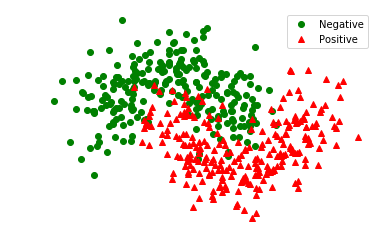

In [3]:
plot_dataset(X,y)

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
log_clf=LogisticRegression(random_state=42)
svm_clf=SVC(random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
# log_clf=LogisticRegression()
# svm_clf=SVC()
# rnd_clf=RandomForestClassifier()
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard'
)

In [5]:
y_train.shape

(375,)

In [6]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [7]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
    

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


2.soft voting

In [8]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [9]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


二、Bagging and Pasting——对相同的predictor使用整个训练集的不同子集进行训练，以增加随机性

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

0.92

In [12]:
import numpy as np
def plot_decision_boundary(model,X,y,ax=[-2,3,-1.5,2],alpha=0.3):
    x1s=np.linspace(ax[0],ax[1],100)
    x2s=np.linspace(ax[2],ax[3],100)
    X1,X2=np.meshgrid(x1s,x2s)
    z=model.predict(np.c_[X1.ravel(),X2.ravel()]).reshape(X1.shape)
    plt.contourf(X1,X2,z,alpha=alpha,linewidth=10)
    plt.plot(X[y==0,0],X[y==0,1],'rs')
    plt.plot(X[y==1,0],X[y==1,1],'go')
    plt.axis('off')
    

c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


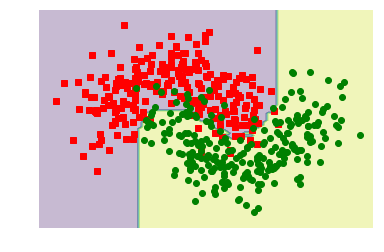

In [13]:
plot_decision_boundary(bag_clf,X,y)

三、随机森林

四、Boosting——将多个weak learner 转变为strong learner

1.AdaBoost的sklearn与手动实现

In [14]:
# Sklearn implementing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200,
                            algorithm='SAMME.R',learning_rate=0.5,random_state=42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [15]:
np.mean(ada_clf.predict(X_test)==y_test)

0.848

手动实现AdaBoost:  
基本思路：对于训练中预测出错的样本，设置较高的样本权重（sample_weigh）。  
sample_weight参数在sklearn的model.fit()中设置，形式是一个1-D array。初始阶段可以将所有样本权重设为相同，随着训练进行改变某些样本权重

c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


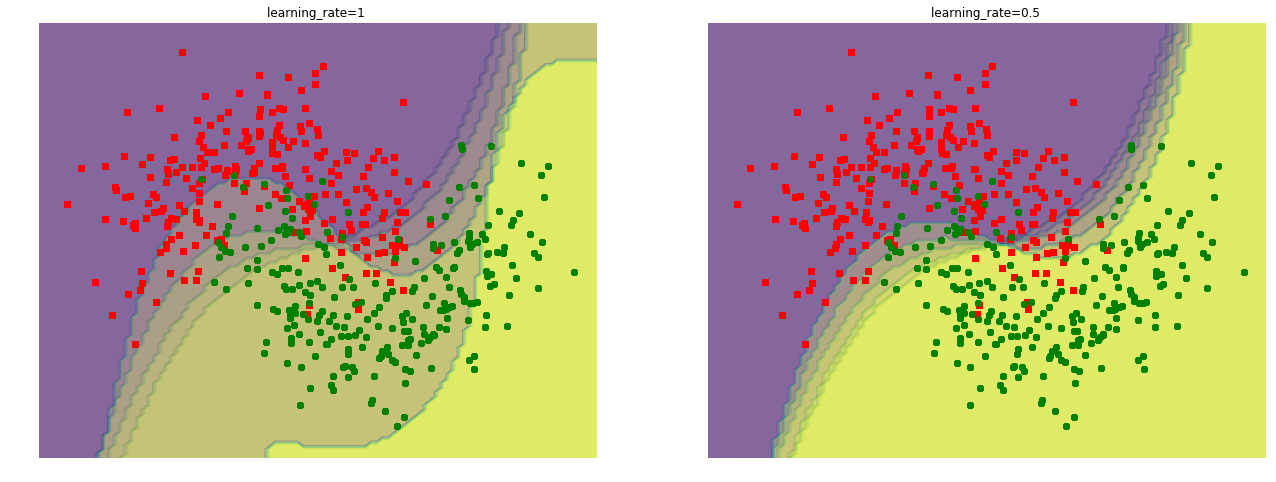

In [16]:

from sklearn.svm import SVC
# m=X.shape[0] 错误！！！
m=X_train.shape[0]
plt.figure(figsize=(22,8))
for subplot,learning_rate in (121,1),(122,0.5):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel='rbf',C=0.05,random_state=42)
        svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
        preds=svm_clf.predict(X_train) #注意这里是X_train!!!在训练过程中调整样本权重
        sample_weights[preds!=y_train] *= 1+learning_rate
        plot_decision_boundary(svm_clf,X,y,alpha=0.2)
        plt.title('learning_rate={} '.format(learning_rate))
        

c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


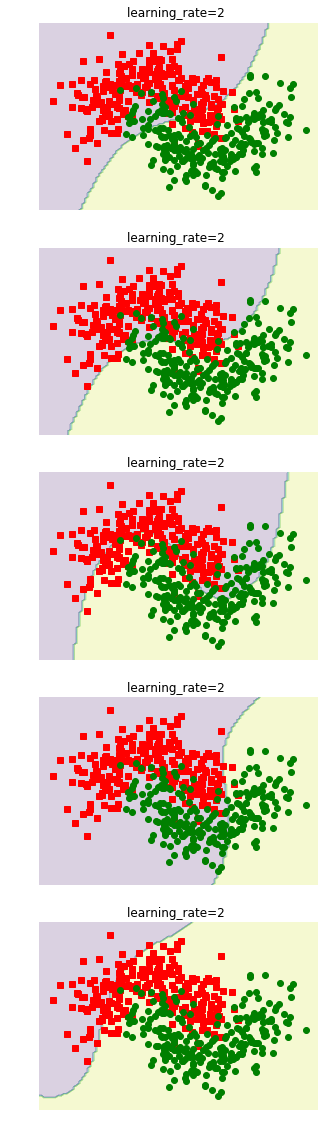

In [17]:
learning_rate=2 #这里设置一个较大的learning rate是为了夸大效果。实际使用会选择更合适的learning rate
# 这里只用五个连续的estimator，结果并不是最好的结果。实际使用需要更多estimator
from sklearn.svm import SVC
# m=X.shape[0] 错误！！！
m=X_train.shape[0]
plt.figure(figsize=(5,20))
sample_weights = np.ones(m)
for i in range(5):
    plt.subplot(511+i)
    svm_clf = SVC(kernel='rbf',C=0.05,random_state=42)
    svm_clf.fit(X_train,y_train,sample_weight=sample_weights)
    preds=svm_clf.predict(X_train) #注意这里是X_train!!!在训练过程中调整样本权重
    sample_weights[preds!=y_train] *= 1+learning_rate
    plot_decision_boundary(svm_clf,X,y,alpha=0.2)
    plt.title('learning_rate={} '.format(learning_rate))


c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


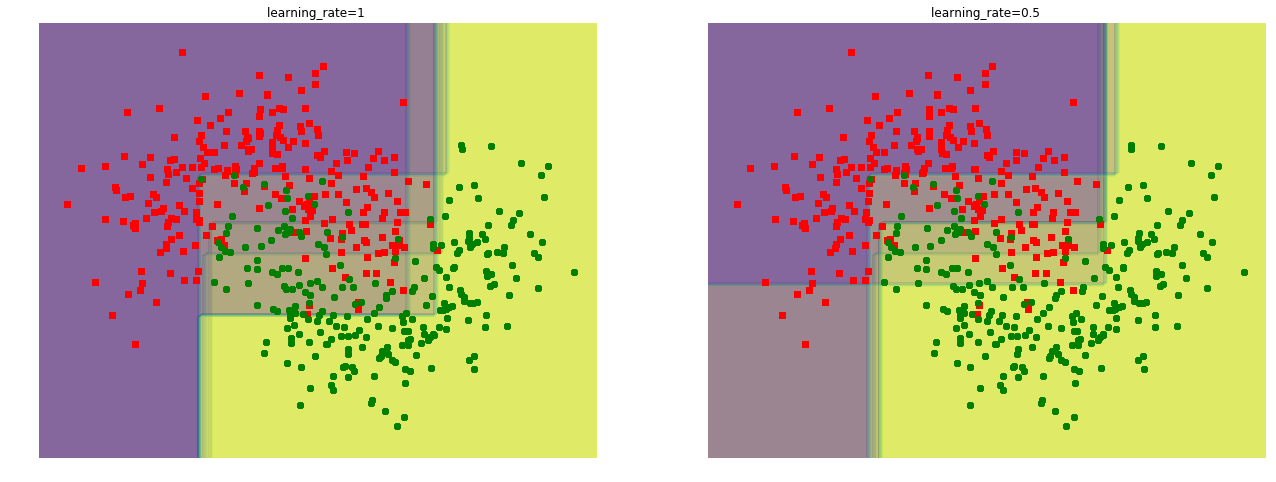

In [18]:
# m=X.shape[0] 错误！！！
m=X_train.shape[0]
plt.figure(figsize=(22,8))
for subplot,learning_rate in (121,1),(122,0.5):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        tree_clf = DecisionTreeClassifier(max_depth=2)
        tree_clf.fit(X_train,y_train,sample_weight=sample_weights)
        preds=tree_clf.predict(X_train) #注意这里是X_train!!!在训练过程中调整样本权重
        sample_weights[preds!=y_train] *= 1+learning_rate
        plot_decision_boundary(tree_clf,X,y,alpha=0.2)
        plt.title('learning_rate={} '.format(learning_rate))

c:\users\chiyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


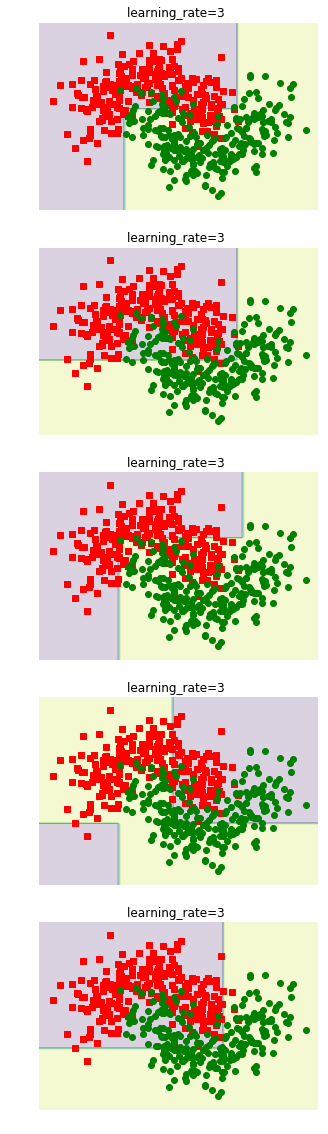

In [19]:
learning_rate=3
# m=X.shape[0] 错误！！！
m=X_train.shape[0]
plt.figure(figsize=(5,20))
sample_weights = np.ones(m)
for i in range(5):
    plt.subplot(511+i)
    tree_clf = DecisionTreeClassifier(max_depth=2)
    tree_clf.fit(X_train,y_train,sample_weight=sample_weights)
    preds=tree_clf.predict(X_train) #注意这里是X_train!!!在训练过程中调整样本权重
    sample_weights[preds!=y_train] *= 1+learning_rate
    plot_decision_boundary(tree_clf,X,y,alpha=0.2)
    plt.title('learning_rate={} '.format(learning_rate))

2.Gradient Boost的sklearn及手动实现——以二次函数曲线拟合为例

首先手动实现一个简单的模型（只有连续三棵树）：

In [20]:
#产生数据：
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
X0=X
y0=y

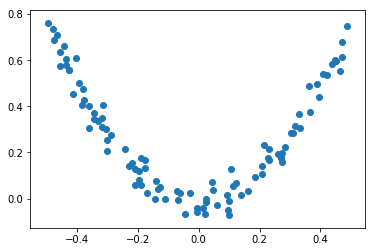

In [21]:
plt.scatter(X,y)

In [22]:
from sklearn.tree import DecisionTreeRegressor
# Base estimator:
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X,y)
y2 = y - tree1.predict(X)
# Second estimator:
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X,y2)
y3 = y2 - tree2.predict(X)
# Third estimator
tree3 = DecisionTreeRegressor(max_depth=2)
tree3.fit(X,y3)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
def plot_predictions(model,X,y,axes=[-0.5, 0.5, -0.1, 0.8],curve_style='r-',data_style='b.',data_label=None,predictions=None):
    plt.clf()
    if predictions is None:
        plt.plot(X,y,data_style)
        x_preds = np.linspace(axes[0],axes[1],100)
        y_preds = model.predict(x_preds.reshape(-1,1))
        plt.plot(x_preds,y_preds,curve_style)
        fig.canvas.draw()
        return y_preds
    else:
        plt.plot(X,y,data_style)
        x_preds = np.linspace(axes[0],axes[1],100)
        plt.plot(x_preds,np.sum(predictions,axis=0),curve_style)
        fig.canvas.draw()

NameError: name 'fig' is not defined

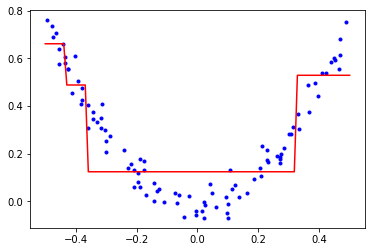

In [24]:
#测试helper function
plot_predictions(tree1,X,y)

<IPython.core.display.Javascript object>


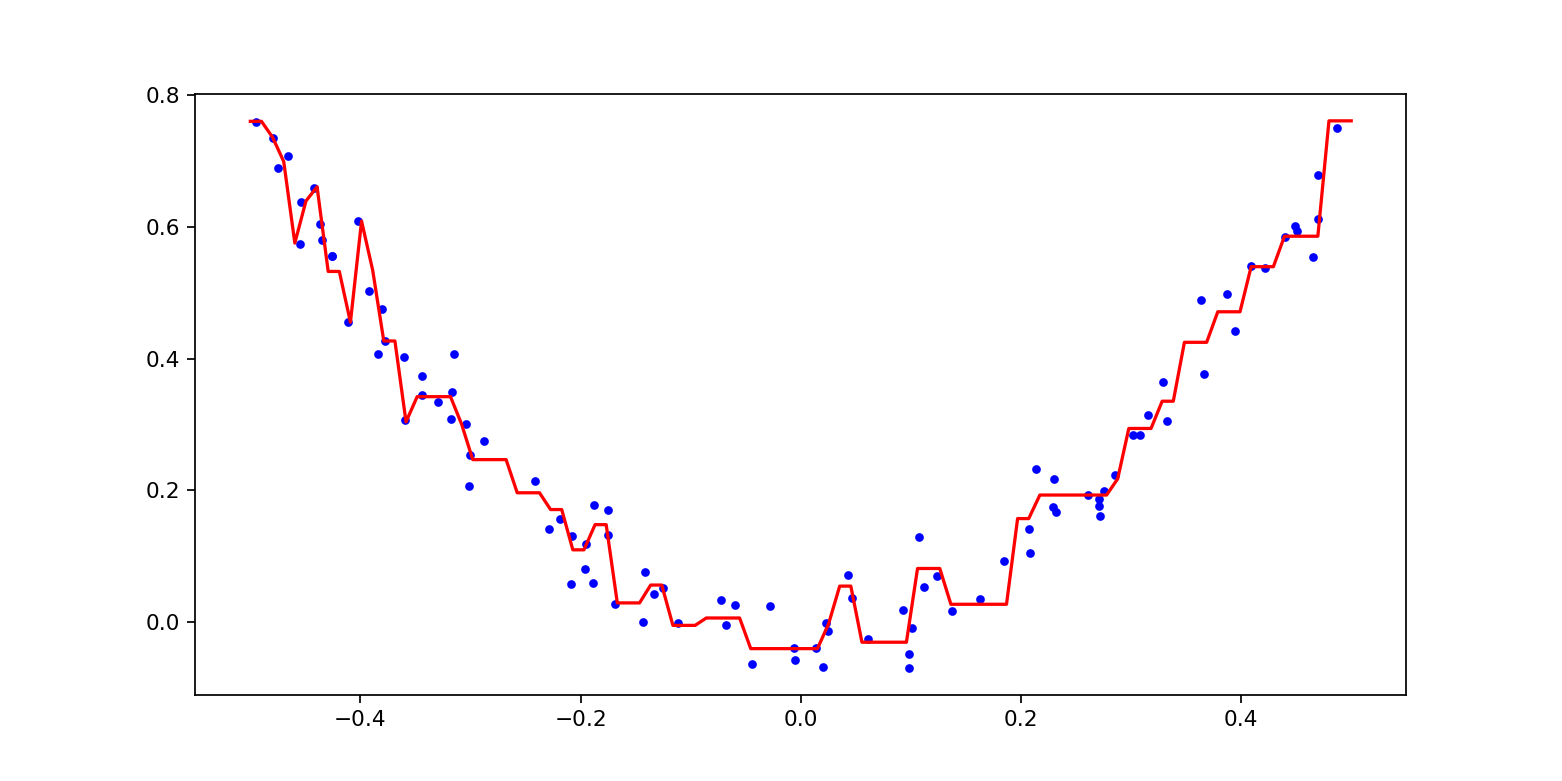

In [25]:
## 问题：并没有实现分成两个子图显示动画。原因：plt.subplot没有生效
%matplotlib notebook
import time
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
n_estimators = 20
predictions=np.zeros((n_estimators,100))
# plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for i in range(n_estimators):
    tree=DecisionTreeRegressor(max_depth=2)
    tree.fit(X,y)
    y_preds=tree.predict(X)
    plt.subplot(211) #没生效
    prediction=plot_predictions(tree,X,y)
    y=y-y_preds
    predictions[i,:]=prediction
    #
    plt.subplot(222) #没生效
    plot_predictions(model=None,X=X0,y=y0,predictions=predictions)
#     plt.cla()
    plt.pause(0.4)

改进上面的作图

<IPython.core.display.Javascript object>


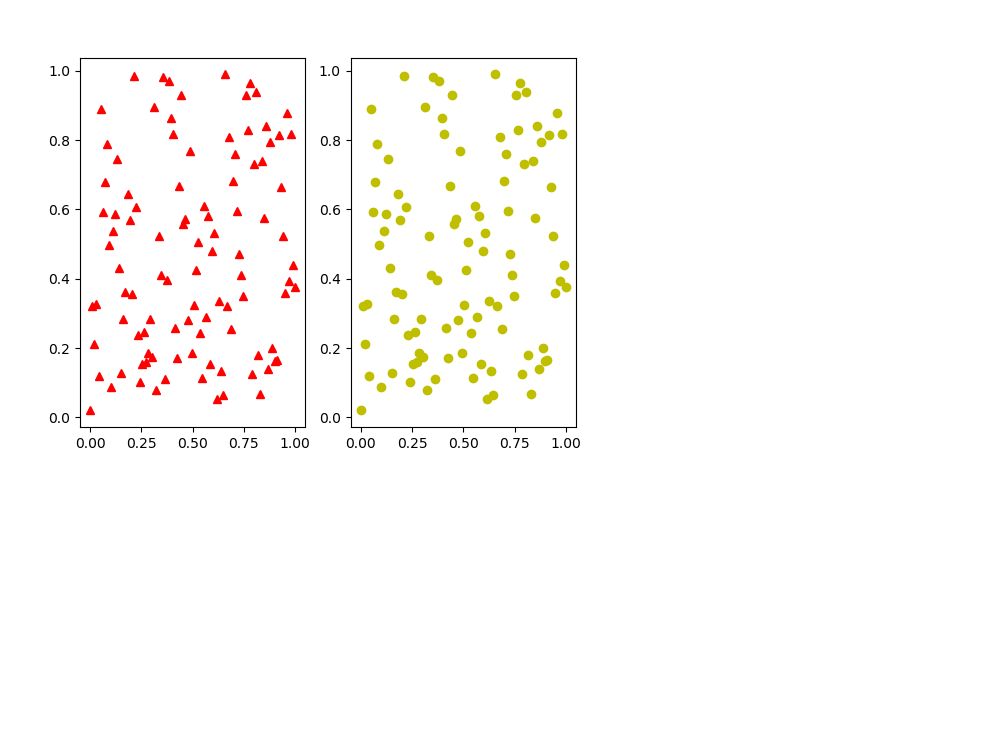

In [26]:
#先举一个小栗子
fig = plt.figure()
# ax1=fig.add_subplot(1,2,1)
# ax2=fig.add_subplot(1,2,2)
for i in range(5):
    fig.clf()
    x = np.linspace(0,1,100)
    y = np.random.random(size=(100,1))
    plt.subplot(121)
    plt.plot(x,y,'r^')
    plt.subplot(122)
    plt.plot(x,y,'yo')
    fig.canvas.draw()
    plt.pause(0.3)

### Gradient Boosting Regression Tree (GBRT) 

<IPython.core.display.Javascript object>


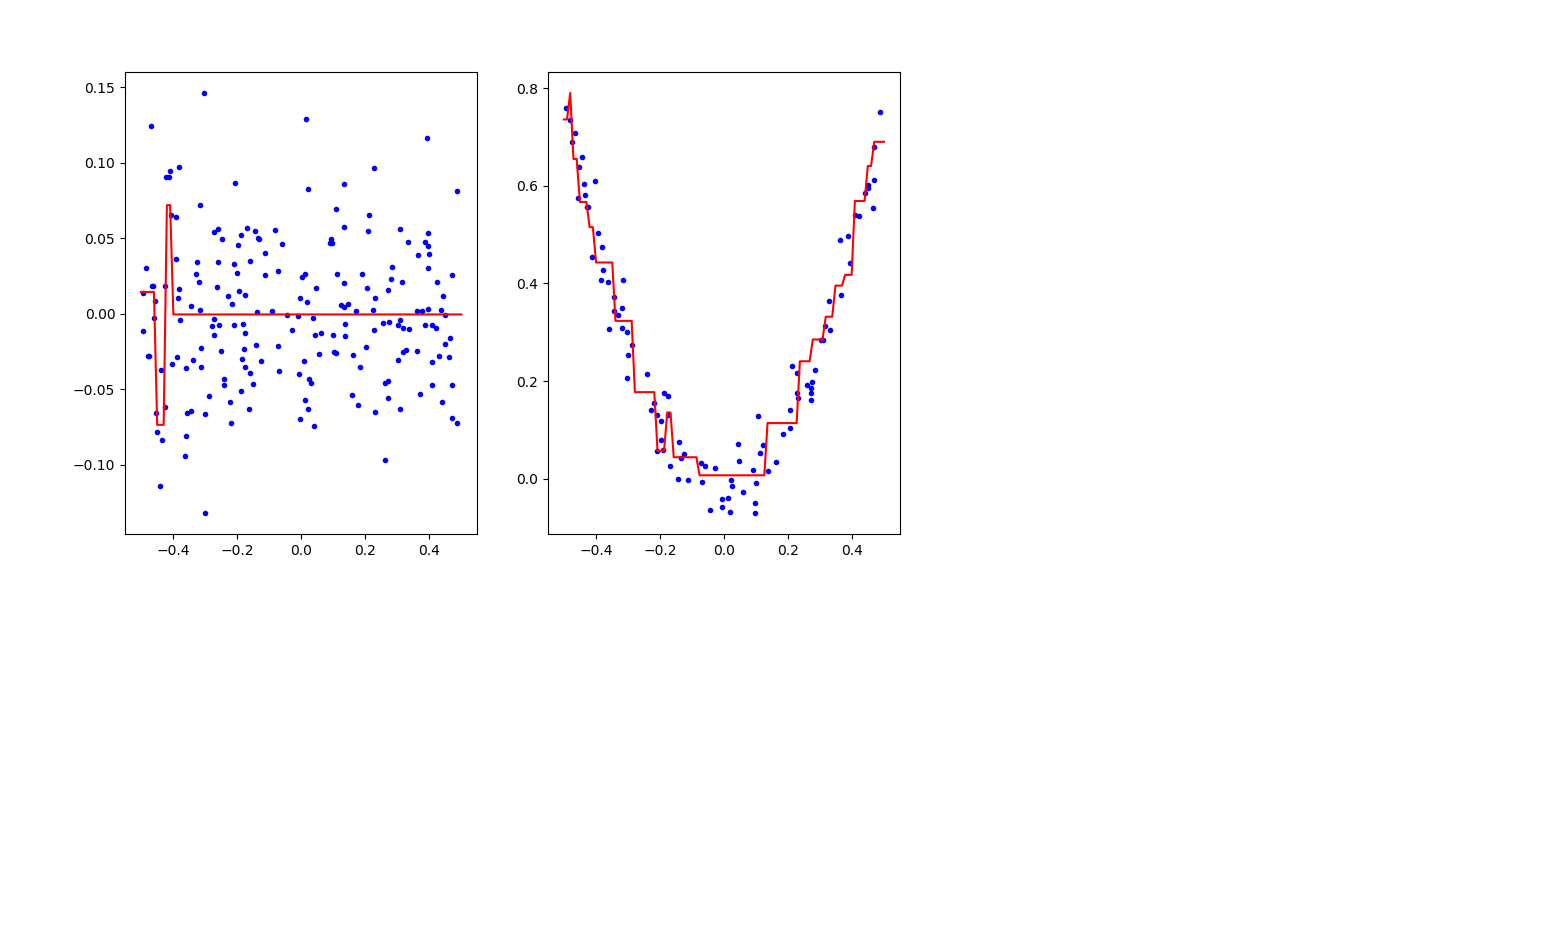

In [27]:
def plot_predictions_v2(model,X,y,axes=[-0.5, 0.5, -0.1, 0.8],curve_style='r-',data_style='b.',data_label=None,predictions=None):
    if predictions is None:
        plt.plot(X,y,data_style)
        x_preds = np.linspace(axes[0],axes[1],100)
        y_preds = model.predict(x_preds.reshape(-1,1))
        plt.plot(x_preds,y_preds,curve_style)
#         fig.canvas.draw()
        return y_preds
    else:
        plt.plot(X,y,data_style)
        x_preds = np.linspace(axes[0],axes[1],100)
        plt.plot(x_preds,np.sum(predictions,axis=0),curve_style)
#         fig.canvas.draw()
%matplotlib notebook
import time
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(200,1)-0.5
y = y = 3*X[:, 0]**2 + 0.05 * np.random.randn(200)
n_estimators = 10
predictions=np.zeros((n_estimators,100))
fig1 = plt.figure(figsize=(10,6))
for i in range(n_estimators):
    fig1.clf()
    tree=DecisionTreeRegressor(max_depth=2)
    tree.fit(X,y)
    y_preds=tree.predict(X)
    plt.subplot(121) #没生效
    prediction=plot_predictions_v2(tree,X,y)
    y=y-y_preds
    predictions[i,:]=prediction 
    #
    plt.subplot(122) #没生效
    plot_predictions_v2(model=None,X=X0,y=y0,predictions=predictions)
    fig1.canvas.draw()
    plt.pause(0.5)

<IPython.core.display.Javascript object>


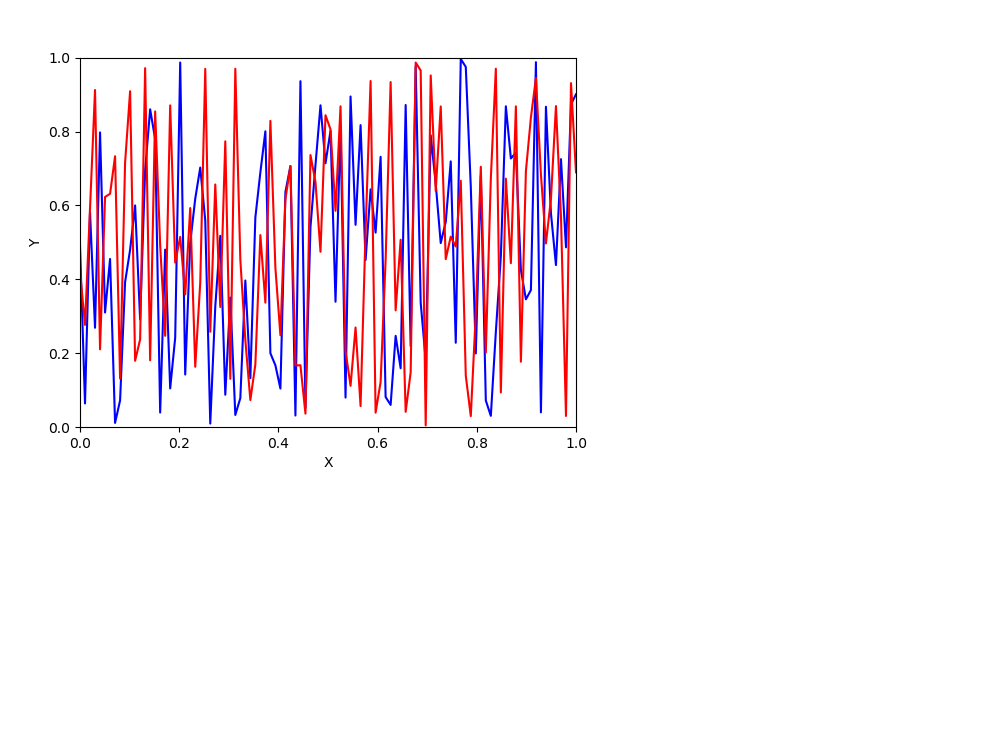

In [28]:
## 示例：如何在jupyter中绘制动态曲线
## 参考https://stackoverflow.com/questions/34486642/what-is-the-currently-correct-way-to-dynamically-update-plots-in-jupyter-ipython
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

==========================================深入GBRT==============================================

问题：通过GBRT可以将多个连续的weak learner转变为strong learner。但是当迭代次数过多时模型会出现过拟合。如何防止过拟合？

答案：两种方法：①迭代完所有次数之后回过头来检查每个迭代次数对应的某种预测分数 ②Early Stopping

方法一：使用sklearn中gbrt的属性staged_predict()获得每个阶段的得分

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
np.random.seed(42)
X = np.random.rand(200,1)-0.5
y = y = 3*X[:, 0]**2 + 0.05 * np.random.randn(200)
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.2) 
gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=400)
gbrt.fit(X_train,y_train)
errors = []

In [30]:
## gbrt.staged_predict产生的是一个generator
gbrt.staged_predict(X_val)

<generator object GradientBoostingRegressor.staged_predict at 0x000001D5D1FEAFC0>

In [31]:
errors = [mse(y_pred,y_val) for y_pred in gbrt.staged_predict(X_val)] #对每一个stage，计算y_pred与y_val的mse值
best_n_estimators = np.argmin(errors)

In [32]:
best_n_estimators

80

In [33]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=80, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

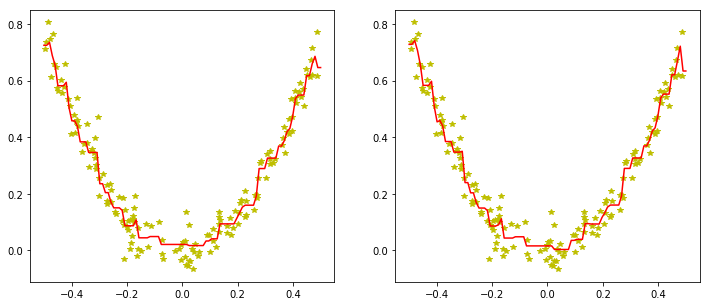

In [39]:
f = plt.figure(figsize=(12,5))
plt.subplot(121)
_ = plot_predictions_v2(gbrt,X_train,y_train,curve_style='r-',data_style='y*')
plt.subplot(122)
_ = plot_predictions_v2(gbrt_best,X_train,y_train,curve_style='r-',data_style='y*')

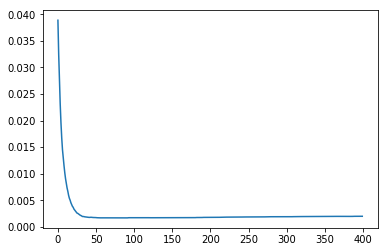

In [35]:
%matplotlib inline
plt.plot(range(400),errors)  #（后面曲线的上升不是很明显）

方法二：Early Stopping

In [36]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float('inf')
error_going_up=0
for num_estimators in range(1,200):
    gbrt.n_estimators=num_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mse(y_pred, y_val)
    if val_error<min_val_error:
        min_val_error=val_error
    else:
        error_going_up+=1
        if error_going_up==5:
            n_estimators_best = num_estimators
            break

In [37]:
n_estimators_best

58

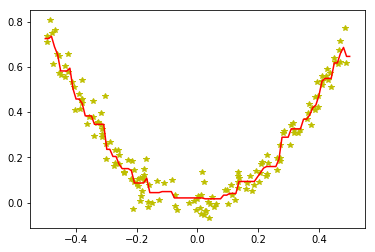

In [46]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=n_estimators_best)
gbrt_best = gbrt.fit(X_train,y_train)
_ = plot_predictions_v2(gbrt_best,X_train,y_train,curve_style='r-',data_style='y*')

In [43]:
del n_estimators

### 五、Stacking

基本思想：train a model to perform aggregation to the predictions of all predictors in an ensemble  
首先由第一层的若干训练好的predictors对样本进行测试，测试结果作为另一个回归的数据集，输入第二层的predictor(称为blender或者meta learner)，以第一层预测结果为输入，得到最终的输出  
策略：使用hold-out set,即将数据集划分成两个子集，第一层用第一个子集训练，然后用第二个子集作为第一层的test set。第二层中有几个predictor就有几个input features （n_dimension_second_layer = n_predictors_first_layer）


Stacking的特点：  
①Models that have their predictions combined must have skill on the problem, but do not need to be the best possible models. This means that you do not need to tune the submodels intently, as long as the model shows some advantage over a baseline prediction.  
即，不需要对子模型进行精细的调参  
②It is important that sub-models produce different predictions, so-called uncorrelated predictions

实现见下一个notebook——Implement_Stacking_ensemble